Author: Shan Qu, Delft University of Technology

First created: 8 April 2021

Product: compare the different models after tuning hyperparameters for them one by one

In [19]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

%run helpers.ipynb

pd.set_option('display.max_columns', 20)
seed = 143

import warnings
warnings.filterwarnings("ignore")

In [29]:
df_preds_LR = pd.read_csv('df_preds_LR.csv')
df_preds_LR['name'] = 'LR'
df_preds_CART = pd.read_csv('df_preds_CART.csv')
df_preds_CART['name'] = 'CART'
df_preds_RF = pd.read_csv('df_preds_RF.csv')
df_preds_RF['name'] = 'RF'
df_preds_XGBoost = pd.read_csv('df_preds_XGBoost.csv')
df_preds_XGBoost['name'] = 'XGBoost'
df_preds_SVM = pd.read_csv('df_preds_SVM.csv')
df_preds_SVM['name'] = 'SVM'
df_preds_NN = pd.read_csv('df_preds_NN.csv')
df_preds_NN['name'] = 'NN'
df_y_val = pd.read_csv('Data/df_y_val.csv')

ls_df_preds = [df_preds_LR, df_preds_CART, df_preds_RF, df_preds_XGBoost, df_preds_SVM, df_preds_NN]
for df_preds in ls_df_preds:
  df_preds.drop('Unnamed: 0', axis=1, inplace=True)

df_y_val.drop('Unnamed: 0', axis=1, inplace=True)

In [35]:
threshold = 0.5
for df_preds in ls_df_preds:
  df_preds['Risk_pred'] = df_preds['prob_default'].apply(lambda x: 1 if x > threshold else 0)


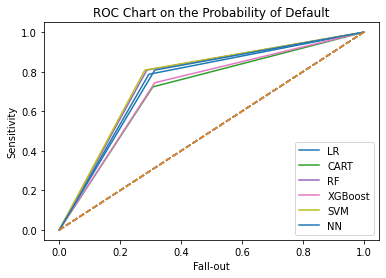

In [36]:
for df_preds in ls_df_preds:
  plot_roc_PD(df_preds['Risk_pred'], df_y_val, df_preds['name'][0])
plt.show()

In [38]:
for df_preds in ls_df_preds:
  print("For " + df_preds['name'][0] + ": \n")
  print(confusion_matrix(df_y_val, df_preds['Risk_pred']))
  print(classification_report(df_y_val, df_preds['Risk_pred'], target_names= ['good', 'bad']))
  print("------------------------------------------------------")


For LR: 

[[108  45]
 [ 10  37]]
              precision    recall  f1-score   support

        good       0.92      0.71      0.80       153
         bad       0.45      0.79      0.57        47

    accuracy                           0.73       200
   macro avg       0.68      0.75      0.69       200
weighted avg       0.81      0.72      0.74       200

------------------------------------------------------
For CART: 

[[106  47]
 [ 13  34]]
              precision    recall  f1-score   support

        good       0.89      0.69      0.78       153
         bad       0.42      0.72      0.53        47

    accuracy                           0.70       200
   macro avg       0.66      0.71      0.66       200
weighted avg       0.78      0.70      0.72       200

------------------------------------------------------
For RF: 

[[109  44]
 [  9  38]]
              precision    recall  f1-score   support

        good       0.92      0.71      0.80       153
         bad       0.46   